In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

In [2]:
cleaned_data_location = 'data/gapminder_cleaned.csv' # didn't include the parent directory
df = pd.read_csv(cleaned_data_location)
df.head()

FileNotFoundError: File b'data/gapminder_cleaned.csv' does not exist

In [9]:
#defensive programming!

VERBOSE = True

cleaned_data_location = '../data/gapminder_cleaned.csv'

try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())

except FileNotFoundError:
    print("Couldn't find data file, check path? You tried", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [18]:
years = df['year'].unique()
years.sort()
assert years[-1] == 2000, "No that's not the latest year" # this is more defensive programming

AssertionError: No that's not the latest year

In [27]:
#another way to subset
#calculate mean life expectancy for asia in 1952

mask_asia = df['continent'] == 'asia' # created a series with true-false
df_asia = df[mask_asia]

years = df_asia['year'].unique()
summary = []

#loopin' through to create series for all the years and append them to the summary

for year in years:
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia', year, value))
    
assert len(summary) == 12 #make sure we have 12 entries

#turn summary into DF for viz
result_df = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])
result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [35]:
#lets refactor into a function!

#calculate mean life expectancy for a continent by all years

category = 'pop'
continent = 'asia'

mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

years = df_continent['year'].unique()
summary = []

#loopin' through to create series for all the years and append them to the summary

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))
    
assert len(summary) == 12 #make sure we have 12 entries

#turn summary into DF for viz
result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
result_df

,continent,year,pop
0,asia,1952,4.228356e+07
1,asia,1957,4.735699e+07
2,asia,1962,5.140476e+07
3,asia,1967,5.774736e+07
4,asia,1972,6.518098e+07
5,asia,1977,7.225799e+07
6,asia,1982,7.909502e+07
7,asia,1987,8.700669e+07
8,asia,1992,9.494825e+07
9,asia,1997,1.025238e+08


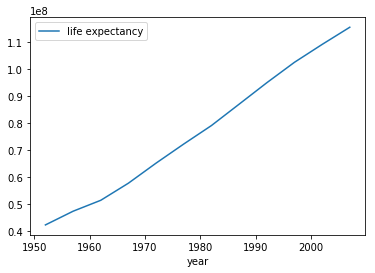

In [36]:
result_df.plot.line('year', category, label = 'life expectancy')

In [37]:
def calculate_mean_over_time(data, dategory, continent, verbose = False):
    #this function calculate mean category for continent by all years
    
    #create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]
    
    #loop over the years and calculate the statistic of interest
    years = df_continent['year'].unique()
    summary = []
    
    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append((continent, year, value))
        
    #there should be 12 record for each continent    
    assert len(summary) == 12

    #turn result into dtaframe for visualization
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df


In [38]:
calculate_mean_over_time(df, 'lifeexp', 'asia', True)

1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


,continent,year,pop
0,asia,1952,4.228356e+07
1,asia,1957,4.735699e+07
2,asia,1962,5.140476e+07
3,asia,1967,5.774736e+07
4,asia,1972,6.518098e+07
5,asia,1977,7.225799e+07
6,asia,1982,7.909502e+07
7,asia,1987,8.700669e+07
8,asia,1992,9.494825e+07
9,asia,1997,1.025238e+08


In [75]:
def calculate_statistic_over_time(data, category, continent, func):
    """Calculate values of a statistic through time
    
    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of a continent column in that data frame (e.g. 'asia')
        func: the function to apply to data values (e.g. np.mean). Must be numpy for summary table name to work.
        
    Returns:
        a summary table of value per years
        """
    # check the values
    assert category in data.columns.values, 'Category must be one of the data frame columns'
    assert 'continent' in data.columns.values, 'continent column not found in data frame'
    assert continent in data['continent'].unique(), 'Continent value not found in data frame'
    
    #create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]
    
    #loop over the years and calculate the statistic of interest
    years = df_continent['year'].unique()
    summary = []
    
    for year in years:
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append((continent, year, value))
        
    #there should be 12 record for each continent    
    assert len(summary) == 12

    #turn result into dtaframe for visualization
    #also a goofy solution for showing function name...just a numpy thing, so not widely applicable
    
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category + ' ' + func.__name__])
    return result_df
    

In [73]:
calculate_statistic_over_time(df, 'pop', 'americas', np.mean)

,continent,year,pop mean
0,americas,1952,13806097.84
1,americas,1957,15478156.64
2,americas,1962,17330810.16
3,americas,1967,19229864.92
4,americas,1972,21175368.40
5,americas,1977,23122707.96
6,americas,1982,25211636.80
7,americas,1987,27310158.84
8,americas,1992,29570964.16
9,americas,1997,31876016.40


['asia' 'europe' 'africa' 'americas' 'oceania']


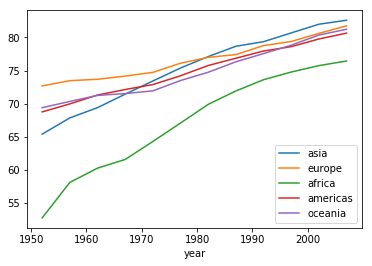

In [85]:
#plot life expectancy over time for all continents

continents = df['continent'].unique()
category = 'lifeexp'
fig, ax = plt.subplots()

for continent in continents:
    func = np.max
    output = calculate_statistic_over_time(df, category, continent, func)
    output.plot.line('year', category + ' ' + func.__name__, ax=ax, label=continent)

print(continents)